In [1]:
import numpy as np
import PIL
import random
from PIL import Image
from PIL import ImageDraw

In [221]:
## Make a keyboard "key"
#Inputs are size = (x,y), coord_ul is upper left coordinate and coord_br is bottom right coordinate of center square
#palette should be a list or tuple of 5 RGBA colors they will color sections A, B, C, D, E respectively
def key_maker(size, coord_ul, coord_br, palette, outline = False):
    
    image = Image.new("RGBA", size)
    draw = ImageDraw.Draw(image)
    
    pt_1 = (coord_ul[0], coord_ul[1])
    pt_2 = (coord_br[0], coord_ul[1])
    pt_3 = (coord_br[0], coord_br[1])
    pt_4 = (coord_ul[0], coord_br[1])
    
    # .polygon([xy..], fill=None, outline=None), xy -  is a list of 2-tuples for coordinates, polygon connects the first and last entries
    # Draw section A
    draw.polygon([(0,0), (size[0]-1,0), pt_2, pt_1], palette[0])
    # Draw section B
    draw.polygon([(0,0), pt_1, pt_4, (0,size[1]-1)], palette[1])
    # Draw section C
    draw.polygon([pt_1,pt_2,pt_3,pt_4], palette[2])
    # Draw section D
    draw.polygon([(size[0]-1,0), (size[0]-1, size[1]-1), pt_3, pt_2], palette[3])
    # Draw section E
    draw.polygon([pt_4,pt_3,(size[0]-1, size[1]-1), (0,size[1]-1)], palette[4])
    
    if outline == True:
        # rectangle(xy, fill=None, outline=None, width=0)
        draw.rectangle([(0,0), (size[0],size[1])], outline = (0,0,0,255), width = 2)
    
    return image

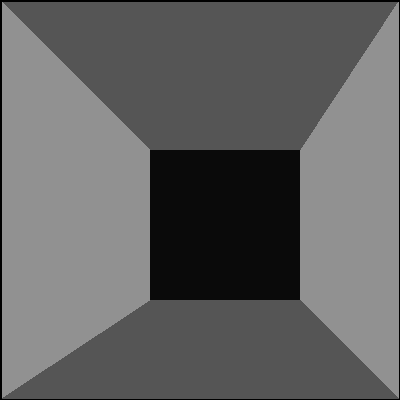

In [222]:
c2 = (10,10,10)
c1 = (140,140,140)
c0 = (85,85,85)
c3 = (145,145,145)
c4 = (200,200,200)
palette = [c0,c3,c2,c3,c0]
image = key_maker((400,400), (150,150), (300,300), palette, outline = True)
image

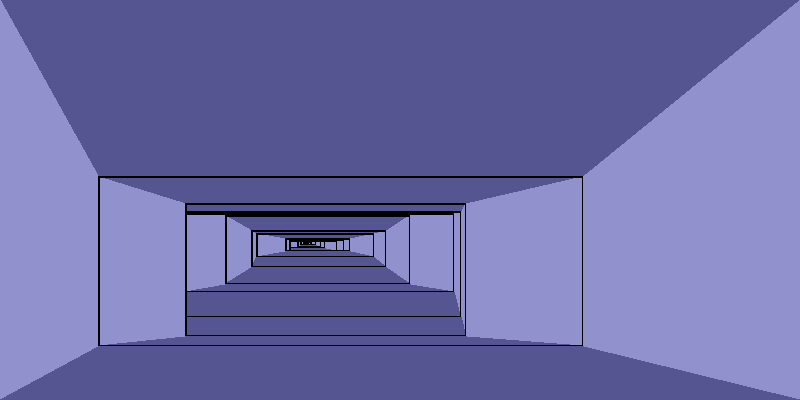

In [223]:
start_size = (800,400)

(x_1,y_1) = (random.randint(0, int((start_size[0]-1)/2)), random.randint(0, int((start_size[1]-1)/2)))
(x_2,y_2) = (random.randint(0, int((start_size[0]-1)/2)) + int(start_size[0]/2), random.randint(0, int((start_size[1]-1)/2))+ int(start_size[1]/2))
c2 = (10,10,70)
c1 = (140,140,200)
c0 = (85,85,145)
c3 = (145,145,205)
c4 = (200,200,230)
palette = [c0,c3,c2,c3,c0]

image = key_maker(start_size, (x_1,y_1), (x_2,y_2), palette)
paste_loc = (int(x_1), int(y_1))
for i in range(35):
    size = (int(x_2-x_1), int(y_2 - y_1))
    (x_1,y_1) = (random.randint(0, int((size[0])/4)), random.randint(0, int((size[1])/4)))
    (x_2,y_2) = (random.randint(int(3*(size[0])/4), int(size[0])), random.randint(int(3*(size[1])/4),size[1]))
    to_paste = key_maker(size, (x_1,y_1),(x_2,y_2), palette, outline = True)
    image.paste(to_paste, paste_loc)
    paste_loc = (int(paste_loc[0]+x_1),int(paste_loc[1]+y_1))

image

In [224]:
image.save("cool_blue_tunnel.png")

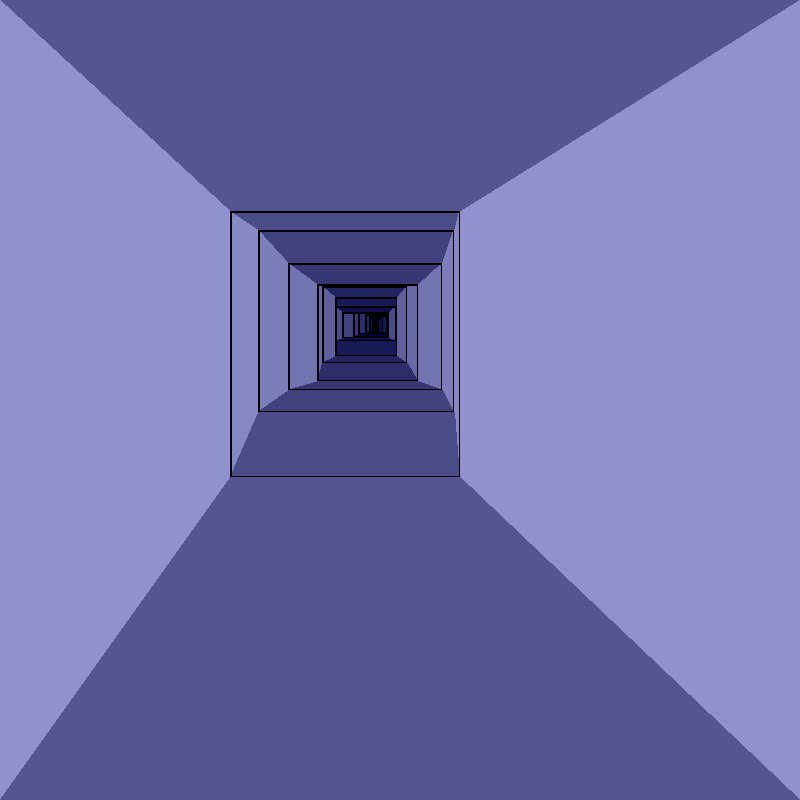

In [225]:


start_size = (800,800)

(x_1,y_1) = (random.randint(0, int((start_size[0])/2)), random.randint(0, int((start_size[1])/2)))
(x_2,y_2) = (random.randint(0, int((start_size[0])/2)) + int(start_size[0]/2), random.randint(0, int((start_size[1])/2))+ int(start_size[1]/2))
c2 = (10,10,70)
c1 = (140,140,200)
c0 = (85,85,145)
c3 = (145,145,205)
c4 = (200,200,230)
palette = [c0,c3,c2,c3,c0]

image = key_maker(start_size, (x_1,y_1), (x_2,y_2), palette)
paste_loc = (int(x_1), int(y_1))
for i in range(25):
    new_palette = []
    for color in palette:
        new_color = (color[0]-10, color[1]-10, color[2]-10)
        new_palette.append(new_color)
    size = (int(x_2-x_1), int(y_2 - y_1))
    (x_1,y_1) = (random.randint(0, int((size[0])/4)), random.randint(0, int((size[1])/4)))
    (x_2,y_2) = (random.randint(int(3*(size[0])/4), int(size[0])), random.randint(int(3*(size[1])/4),size[1]))
    to_paste = key_maker(size, (x_1,y_1),(x_2,y_2), new_palette, outline = True)
    image.paste(to_paste, paste_loc)
    paste_loc = (int(paste_loc[0]+x_1),int(paste_loc[1]+y_1))
    palette = new_palette[:]
image

In [226]:
image.save("cool_blue_tunnel_shading_no_outlines_1_width_mistake.png")

In [227]:
## Can I define a function to create this effect?
## size is a 2-tuple = (x,y)
## palette is a list or tuple of three colors
def shaded_corridor(size, palette, iterations, outline = True):

    (x_1,y_1) = (random.randint(0, int((size[0]-1)/2)), random.randint(0, int((size[1]-1)/2)))
    (x_2,y_2) = (random.randint(0, int((size[0]-1)/2)) + int(size[0]/2), random.randint(0, int((size[1]-1)/2))+ int(size[1]/2))
    key_maker_palette = [palette[0],palette[1], palette[2], palette[1], palette[0]]

    image = key_maker(size, (x_1,y_1), (x_2,y_2), key_maker_palette)
    paste_loc = (int(x_1), int(y_1))

    for i in range(iterations):
        new_palette = []
        for color in key_maker_palette:
            new_color = (color[0]-10, color[1]-10, color[2]-10)
            new_palette.append(new_color)
        size = (int(x_2-x_1), int(y_2 - y_1))
        (x_1,y_1) = (random.randint(0, int((size[0])/4)), random.randint(0, int((size[1])/4)))
        (x_2,y_2) = (random.randint(int(3*(size[0])/4), int(size[0])), random.randint(int(3*(size[1])/4),size[1]))
        to_paste = key_maker(size, (x_1,y_1),(x_2,y_2), new_palette, outline = outline)
        image.paste(to_paste, paste_loc)
        paste_loc = (int(paste_loc[0]+x_1),int(paste_loc[1]+y_1))
        key_maker_palette = new_palette[:]
        
    return image

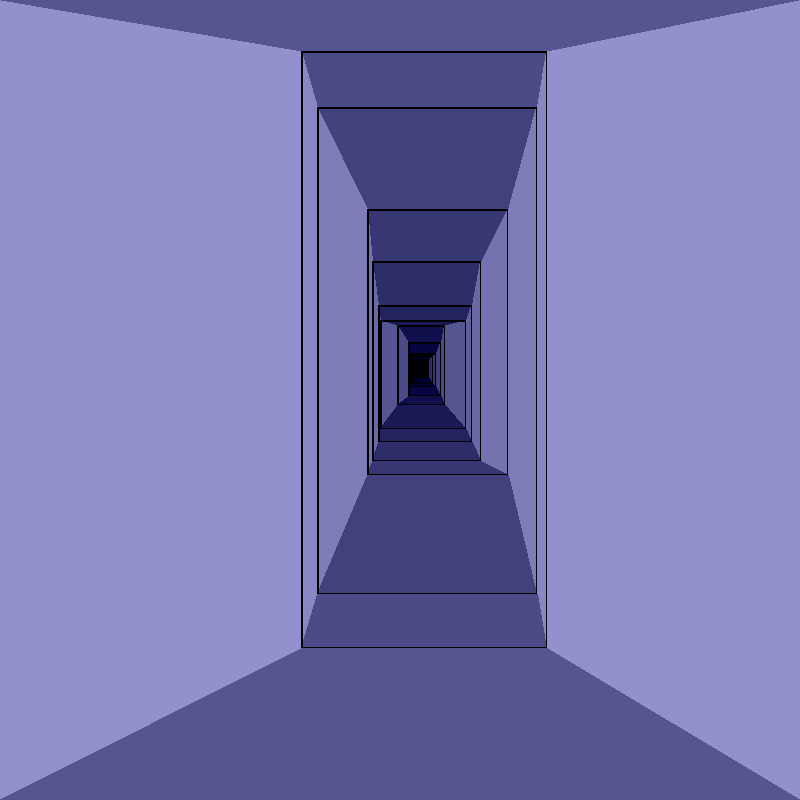

In [228]:
size = (800,800)
palette = [(85,85,145), (145,145,205), (10,10,70)]
iterations = 10
shaded_corridor(size, palette, iterations, outline = True)

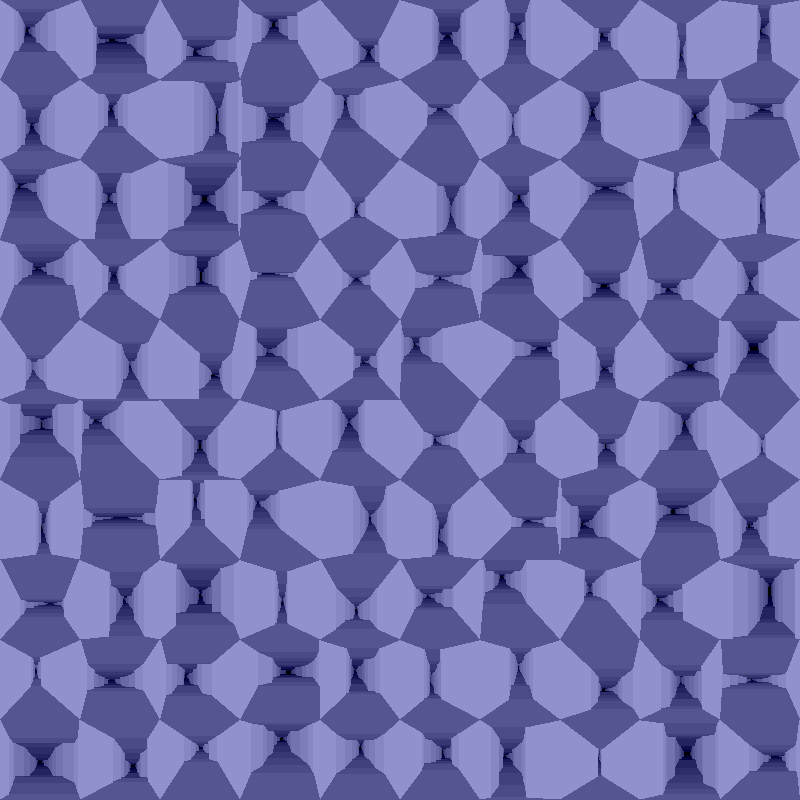

In [229]:
big_pic = Image.new("RGBA", (800,800))
draw = ImageDraw.Draw(big_pic)
palette = [(85,85,145), (145,145,205), (10,10,70)]
iterations = 10
size = (80,80)
for x in range(10):
    for y in range(10):
        image = shaded_corridor(size, palette, iterations, outline = False)
        big_pic.paste(image, (x*80,y*80))
big_pic

In [230]:
## Make it further change-able
## Takes in x_iter and y_iter, two integers as to how many times to run the corridor in either direction
## size, which will be the pixel size of each individual corridor
## palette, a list of three colors
## iterations in which we specify how "deep" each square goes
## optional "outline"
def corridor_universe(x_iter,y_iter, size, palette, iterations, outline = False):
    big_pic = Image.new("RGBA", (x_iter*size[0], y_iter*size[1]))
    draw = ImageDraw.Draw(big_pic)
    for x in range(x_iter):
        for y in range(y_iter):
            image = shaded_corridor(size, palette, iterations, outline = outline)
            big_pic.paste(image, (x*size[0],y*size[1]))
    return big_pic

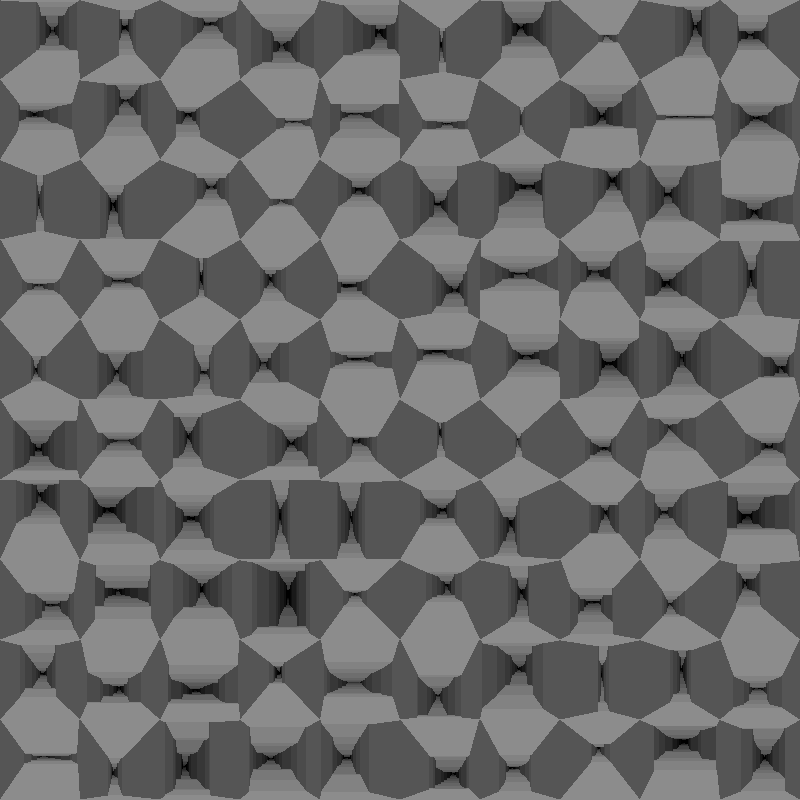

In [265]:
x_iter = 10
y_iter = 10
size = (80,80)
iterations  =15
outline = False
palette = [(140,140,140), (85,85,85), (10,10,10)]
#(85,85,145)
image = corridor_universe(x_iter, y_iter, size, palette, iterations, outline=False)
image

In [258]:
image.save("corridor_universe_cool_purple_4_4.png")